In [25]:
#A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

#B
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

#C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]

In [26]:
import numpy as np
import matplotlib.pyplot as plt


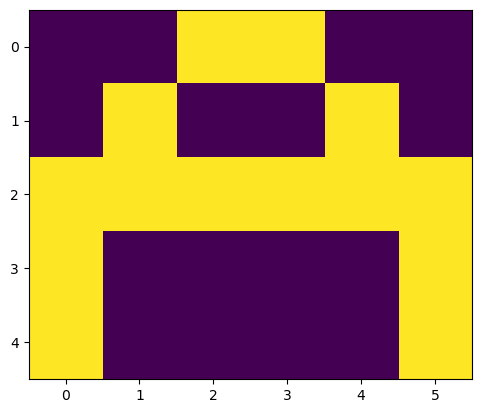

In [27]:
#visualise the data 
plt.imshow(np.array(a).reshape(5,6))
plt.show()

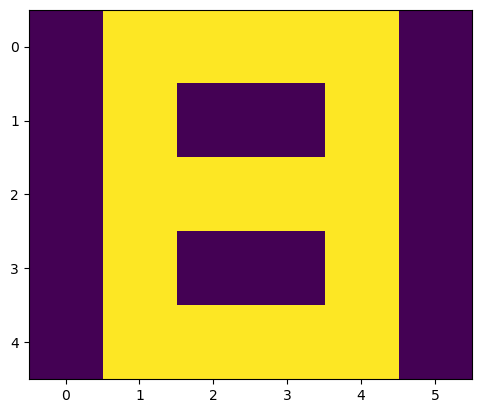

In [28]:
#visualize for b
plt.imshow(np.array(b).reshape(5,6))
plt.show()

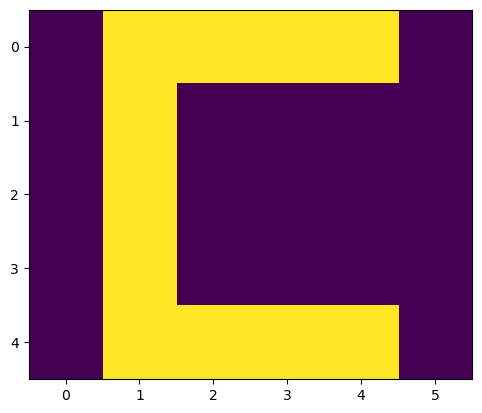

In [29]:
#visualize for c
plt.imshow(np.array(c).reshape(5,6))
plt.show()

In [30]:
#convert data and labels into numpy arrays
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
#creating labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]
y=np.array(y)
print(x)
print(y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [31]:
#input(1,30)
#hidden(1,5)
#output(3,3)


In [32]:
# A, B, C binary representations (you can tweak if needed)
A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,0,0,1,0],
    [1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1]
]).flatten()

# Inputs (30-dimensional vectors) and one-hot encoded labels
X = np.array([A, B, C])  # shape (3, 30)
y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])  # shape (3, 3)


In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [34]:
input_size = 30
hidden_size = 16
output_size = 3
np.random.seed(42)

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [35]:
epochs = 10000
learning_rate = 0.1
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss (mean squared error)
    loss = np.mean((y - a2)**2)
    losses.append(loss)

    # Backpropagation
    error = y - a2
    d_output = error * sigmoid_derivative(a2)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Weight updates
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Print every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.4021
Epoch 1000, Loss: 0.0025
Epoch 2000, Loss: 0.0010
Epoch 3000, Loss: 0.0006
Epoch 4000, Loss: 0.0004
Epoch 5000, Loss: 0.0003
Epoch 6000, Loss: 0.0003
Epoch 7000, Loss: 0.0002
Epoch 8000, Loss: 0.0002
Epoch 9000, Loss: 0.0002


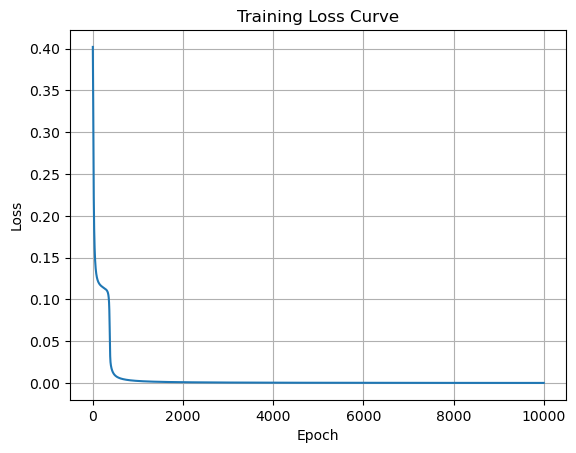

In [36]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


True: A, Predicted: A


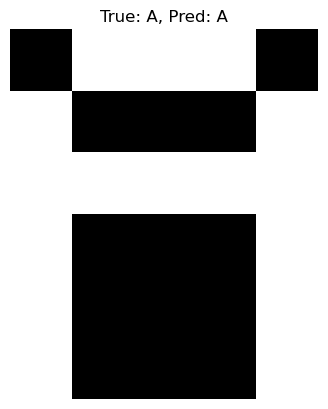

True: B, Predicted: B


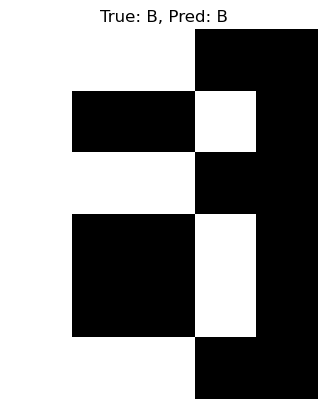

True: C, Predicted: C


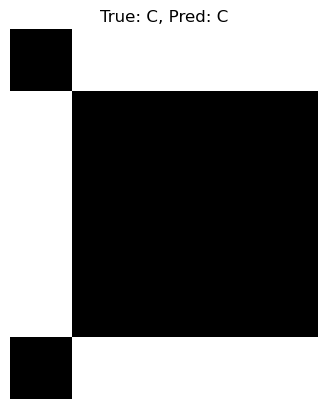

In [37]:
def predict(letter_pattern):
    z1 = np.dot(letter_pattern, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.argmax(a2)

# Display predictions and visualize
letters = [A, B, C]
names = ['A', 'B', 'C']

for i, letter in enumerate(letters):
    pred = predict(letter.reshape(1, -1))
    print(f"True: {names[i]}, Predicted: {names[pred]}")
    plt.imshow(letter.reshape(6, 5), cmap='gray')
    plt.title(f"True: {names[i]}, Pred: {names[pred]}")
    plt.axis('off')
    plt.show()
